In [24]:
#import packages
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Activation
from tensorflow.keras.optimizers import SGD
from keras.regularizers import l2

In [25]:
# load train and test dataset
def load_dataset():
	# load dataset
	(x_train, y_train), (x_test, y_test) = cifar10.load_data()
	
	y_train = to_categorical(y_train)
	y_test = to_categorical(y_test)
	return x_train, y_train, x_test, y_test

In [26]:
# Preprocessing and normailzation
def normalization(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

In [27]:
# The CNN model is defined 
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))	
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dropout(0.2))
  model.add(Dense(10, activation='softmax'))
 
  opt = SGD(learning_rate=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model


In [28]:
import time

start = time.time()
# load dataset
x_train, y_train, x_test, y_test = load_dataset()
# prepare pixel data
x_train, x_test = normalization(x_train, x_test)
# define model
model = define_model()
# fit model
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test), verbose=0)
print("Total time: ", time.time() - start, "seconds")

Total time:  471.8665819168091 seconds


Test loss: 0.5671069622039795
Test accuracy: 0.8317999839782715
Training loss: 0.05763578787446022
Training accuracy: 0.9894199967384338


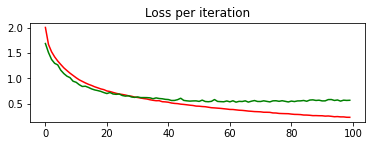

In [29]:
# Testing loss
scores = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
print_loss=True
# Training accuracy
score = model.evaluate(x_train, y_train, verbose=0)
print('Training loss:', score[0])
print('Training accuracy:', score[1])
print_loss=True
pyplot.subplot(211)
pyplot.title('Loss per iteration')
pyplot.plot(history.history['loss'], color='red', label='train')
pyplot.plot(history.history['val_loss'], color='green', label='test')


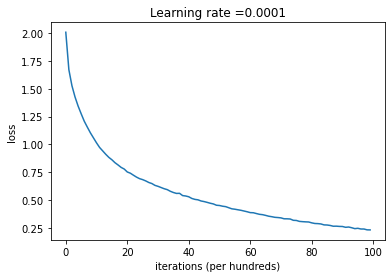

In [30]:
# plot learning curves 
from matplotlib import pyplot
import matplotlib.pyplot as plt
pyplot.plot(history.history['loss'], label='train')
plt.ylabel('loss')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(.0001))
plt.show()

In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn import metrics
from keras.models import Sequential
from tensorflow.keras.applications.resnet50 import ResNet50
y_pred = model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)
y_test=np.argmax(y_test,axis=1)
#print(y_test)
#print(y_pred)

y_test.shape




#
# Calculate the confusion matrix

#conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#print(classification_report(y_test, y_pred))

(10000,)

In [32]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1000
           1       0.91      0.92      0.92      1000
           2       0.80      0.72      0.76      1000
           3       0.70      0.64      0.67      1000
           4       0.79      0.84      0.81      1000
           5       0.71      0.80      0.75      1000
           6       0.86      0.90      0.88      1000
           7       0.91      0.84      0.87      1000
           8       0.90      0.91      0.91      1000
           9       0.88      0.90      0.89      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



In [34]:
y_pred.shape

(10000,)